# Construction of an Elementary cellular automaton

*'In mathematics and computability theory, an elementary cellular automaton is a one-dimensional cellular automaton where there are two possible states (labeled 0 and 1) and the rule to determine the state of a cell in the next generation depends only on the current state of the cell and its two immediate neighbors'* (Extracted from the Wikipedia)

As described above, a Cellular automaton is a simple way of creating far complex structures **from very simple rules**. This fact is one of the key ideas that is underneath Stephen Wolfram's *Fundamental Theory of Physics*. My main goal is to provide a powerful Python code in order to generate a Elementary cellular automaton.

A theoretical framework will be provided first, then the whole code with some fancy and intriguing results.

### Theoretical framework

First of all, there is a need to define a dimensional space in which the cellular automaton will be developed. In this case, that space will be a grid. This grid has a dimension of $NxN$ in which the $X-Axis$ will represent the cells, and the $Y-Axis$ each generation of cells (in descendent order). At the beginning there will be only one cell with state = 1 (as shown below), the rest of them will have a state = 0. Each cell has his own 'space' delimited by the grid regardless of its state. Be aware that the states of the cell can be 0 or 1 . Think about this as the cell being alive or dead. In more formal terms the state of each cell $c$ can be defined as:

$$c_{k}\hspace{10pt}\forall\hspace{10pt}k=\left \{ 0 ,1\right \}$$

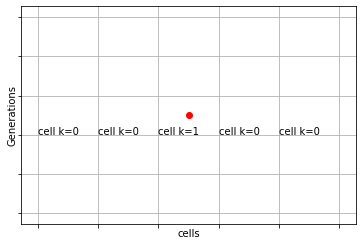

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 


fig, ax = plt.subplots()
ax.grid()
cell=ax.plot(1.01,1.01,'ro')
ax.tick_params(
    axis='both',          
    which='both',
    labelbottom=False,
    labelleft=False)
plt.xlabel('cells')
plt.ylabel('Generations')
an1=ax.annotate('cell k=1',xy=(1,1))
an2=ax.annotate('cell k=0',xy=(1.02,1))
an3=ax.annotate('cell k=0',xy=(0.98,1))
an4=ax.annotate('cell k=0',xy=(0.96,1))
an5=ax.annotate('cell k=0',xy=(1.04,1))
plt.show()

The next step will be to generate 'generation-rules' that apply to each cell. **These 'generation-rules' will affect the neighbor (left and right) cells and the given main cell**.
Each cell can have two states, and each cell has two adjacent. That means that there are $2^{3}$ possible outcomes in which the center cell (C), the left cell(L) and the right cell(R) are either in state $k=1$ (state = 1) or in state $k=0$ (state = 0) generating a given tuple $\left ( c_{k}^{L},c_{k}^{C},c_{k}^{R} \right )$. Formally in code:

In [2]:
print('L,C,R')
for i in range(0,2):
    for j in range(0,2):
        for z in range(0,2):
            print(i,j,z)

L,C,R
0 0 0
0 0 1
0 1 0
0 1 1
1 0 0
1 0 1
1 1 0
1 1 1


Now we need to specify a 'generation-rule' for **each of this possible outcomes**. That means that if there is a given outcome, let's say the tuple $\left ( 0,1,0 \right )$ -right cell with state 0, center cell with state 1, right cell with state 0- **then the next generation cell shall follow a specific rule of generation: let's say it makes the cell move from state $k=0$ (state = 0) to state $k=1$ (state = 1)**. (Remember that this Cellular automaton begins with only ONE cell that is in state $k=1$, so it's sorrounded by adjacent cells that are in state $k=0$).

So far so good. Now think that if there are 8 outcomes for the position of the cells and only two possible outcomes for the next cell generated, then we will have $2^{8}=256$ possible rules. Therefore, a way of formalizing this concept is through bits, because they only have two states $Bit=\left \{ 0 ,1\right \}$. For example (as proposed by Stephen Wolfram):

| Current pattern | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| New state for center cell | 0 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |


The table described above says us that if the tuple has $\left ( 1,1,1 \right )$ then the next generation center cell shall have a state equal to $k=0$. But if the tuple has $\left ( 1,1,0 \right )$ then the next generation center cell shall have a state equal to $k=1$.
¿But how do we get the rules for each pattern? Simple! We have 256 possible rules, so let's represent each of them in 8-bits. Some examples below:

In [3]:
import numpy as np

print('The 8-bit representation of number 10 is:', np.binary_repr(10,width=8))
print('The 8-bit representation of number 25 is:',np.binary_repr(25,width=8))
print('The 8-bit representation of number 256 is:',np.binary_repr(255,width=8))

The 8-bit representation of number 10 is: 00001010
The 8-bit representation of number 25 is: 00011001
The 8-bit representation of number 256 is: 11111111


IMPORTANT: through 8-bits representation you can only represent the first 256 integers! (from 0 to 255). Why? because there are only $2^{8}=256$ possible combinations of these bits. So that means that greater integers than 255 will need more than 8-bits.

So now define our rule in a proper-formal way:

| Current pattern | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| New state for center cell | $b_{k}^{1}$ | $b_{k}^{2}$ | $b_{k}^{3}$ | $b_{k}^{4}$ | $b_{k}^{5}$ | $b_{k}^{6}$ | $b_{k}^{7}$ | $b_{k}^{8}$ |


Where the superindex is equal to the position of the string of the bit, and $k$ is equal to the state of that bit.

### Example 

Let's say we want to perform rule number 10, so that means that we need the 8-bit representation of integer number 10:

In [4]:
print('The 8-bit representation of number 10 is:', np.binary_repr(10,width=8))

The 8-bit representation of number 10 is: 00001010


| Current pattern | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| New state for center cell | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 0 |

Let's start with two given cells (pointed out in red and blue). For the current position of the cell pointed out in red, we have the tuple $\left ( 0,1,1 \right )$, so the next generation cell will have a state equal to $k=1$ as we can see above in the table (The next generation cell is drawn in yellow).

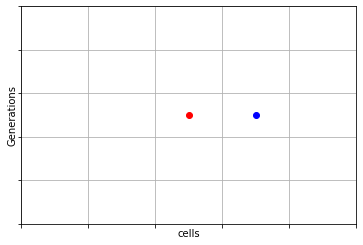

In [5]:
plt.grid()
plt.plot(2.5,2.5,'ro',3.5,2.5,'bo')
plt.xlim(0,5)
plt.ylim(0,5)
plt.tick_params(
    axis='both',          
    which='both',
    labelbottom=False,
    labelleft=False)
plt.xlabel('cells')
plt.ylabel('Generations')
plt.show()

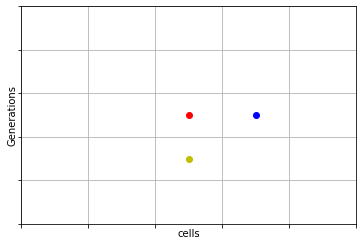

In [6]:
plt.grid()
plt.plot(2.5,2.5,'ro',3.5,2.5,'bo',2.5,1.5,'yo')
plt.xlim(0,5)
plt.ylim(0,5)
plt.tick_params(
    axis='both',          
    which='both',
    labelbottom=False,
    labelleft=False)
plt.xlabel('cells')
plt.ylabel('Generations')
plt.show()

To sum up, we will need to do this for each cell-space in each generation row, following the rule of the 8-bit generator.

# THE CODE

Now we are able to write all this into code. We just need to insert two inputs: number of generations (or iterations/rows), and the rule we want to follow (from 0 to 255). The code is going to fullfil a Matrix of 0's and 1's generated by the given rule. 0 is drawn as a black point, 1 as a white point.
We will start with one unique cell located at the middle-top of the space. Formally at $(0xN/2)$.

In [7]:
def cellular_automaton(iterations,integer):
    canvas = np.zeros([iterations,iterations])
    canvas[0,int(iterations/2)] = 1
    binary_rep = list(np.binary_repr(integer,width=8))

    values = []
    for z in range(0,2):
        for j in range(0,2):
            for t in range(0,2):
                values.append((z,j,t))
    values.reverse()
    tuple_=list(zip(values,binary_rep))    


    
    for i in range(0,iterations):
        for j in range(0,iterations):
            
            for s in range(0,len(tuple_)):
                if i==iterations-1 or j==iterations-1:
                    pass
                
                elif canvas[i,j] == int(tuple_[s][0][1]) and \
                canvas[i,j-1] == int(tuple_[s][0][0]) and \
                canvas[i,j+1] == int(tuple_[s][0][2]):
                    canvas[i+1,j] = int(tuple_[s][1])
                else:
                    pass
    plt.figure(figsize=(15, 15))           
    return plt.imshow(canvas,cmap='gray') 

## Rule 30
This rule is of particular interest because it produces complex, seemingly random patterns from simple, well-defined rules. Because of this, Wolfram believes that Rule 30, and cellular automata in general, are the key to understanding how simple rules produce complex structures and behaviour in nature.
###### 600 generations

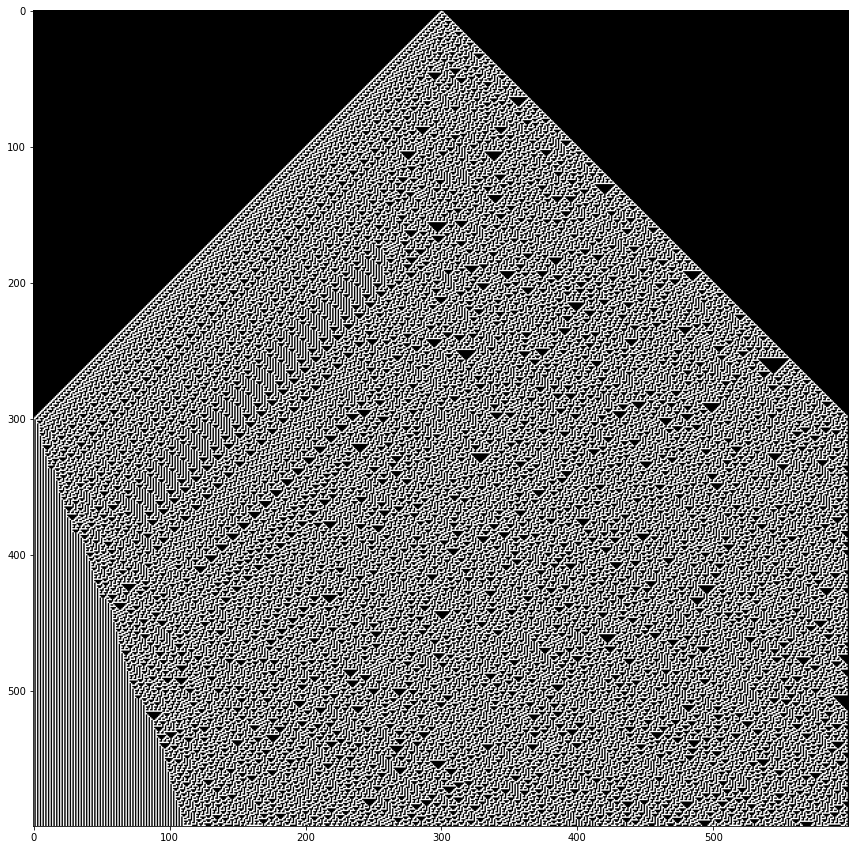

In [8]:
cellular_automaton(600,30)

###### 1200 generations

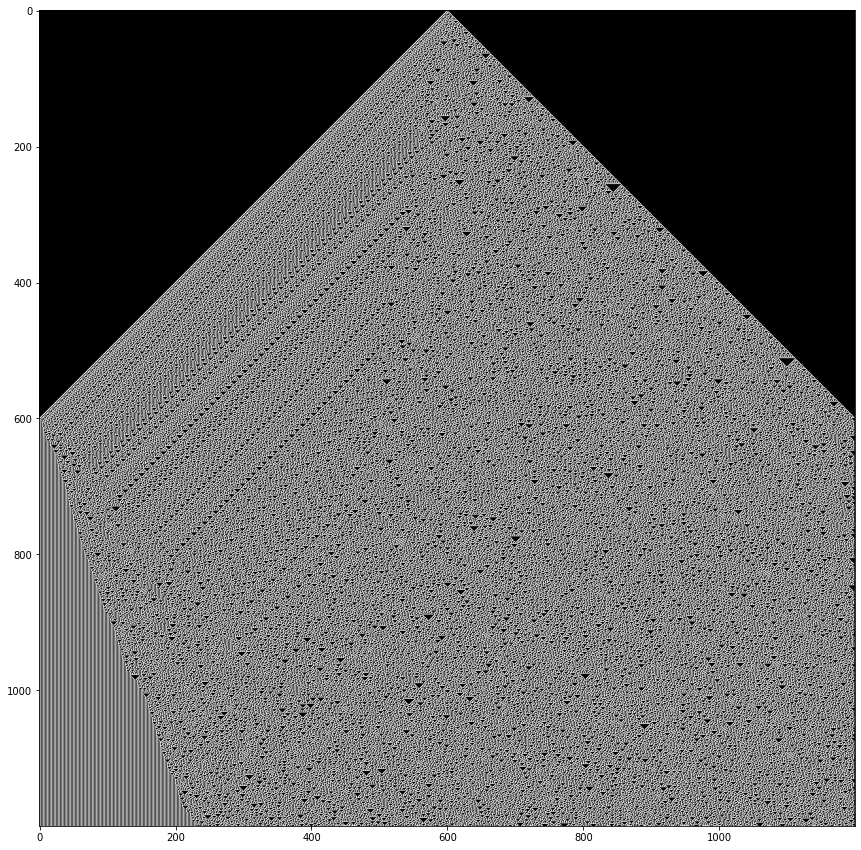

In [9]:
cellular_automaton(1200,30)

## Rule 110
Rule 110 is capable of universal computation, and as such it is one of the simplest possible models of computation.
##### 600 generations

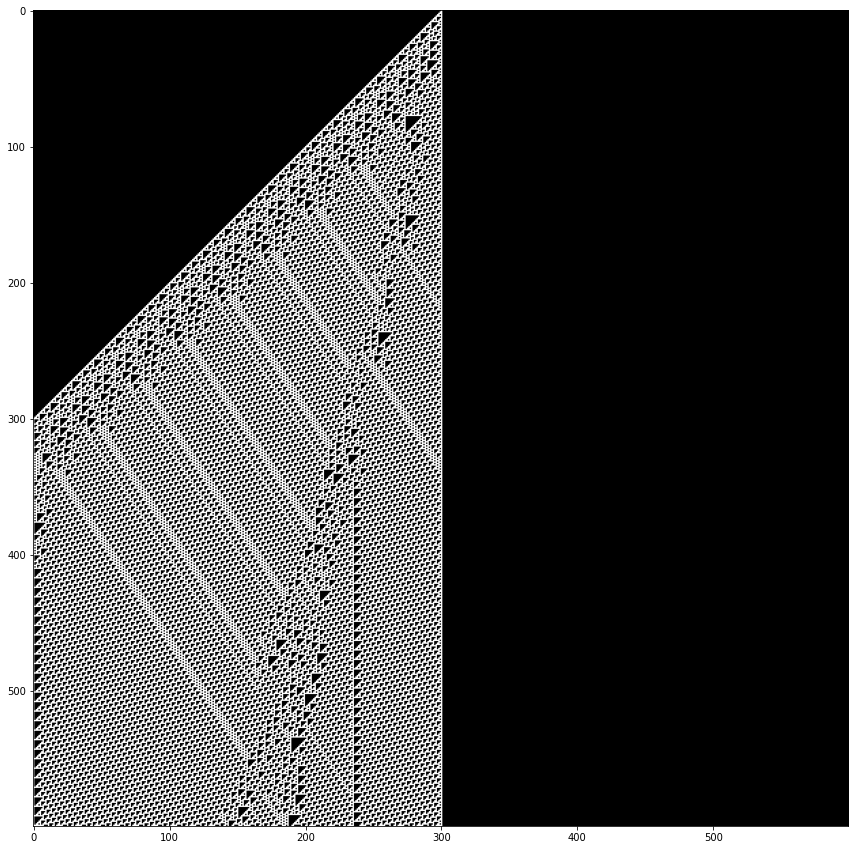

In [10]:
cellular_automaton(600,110)

##### 1200 generations

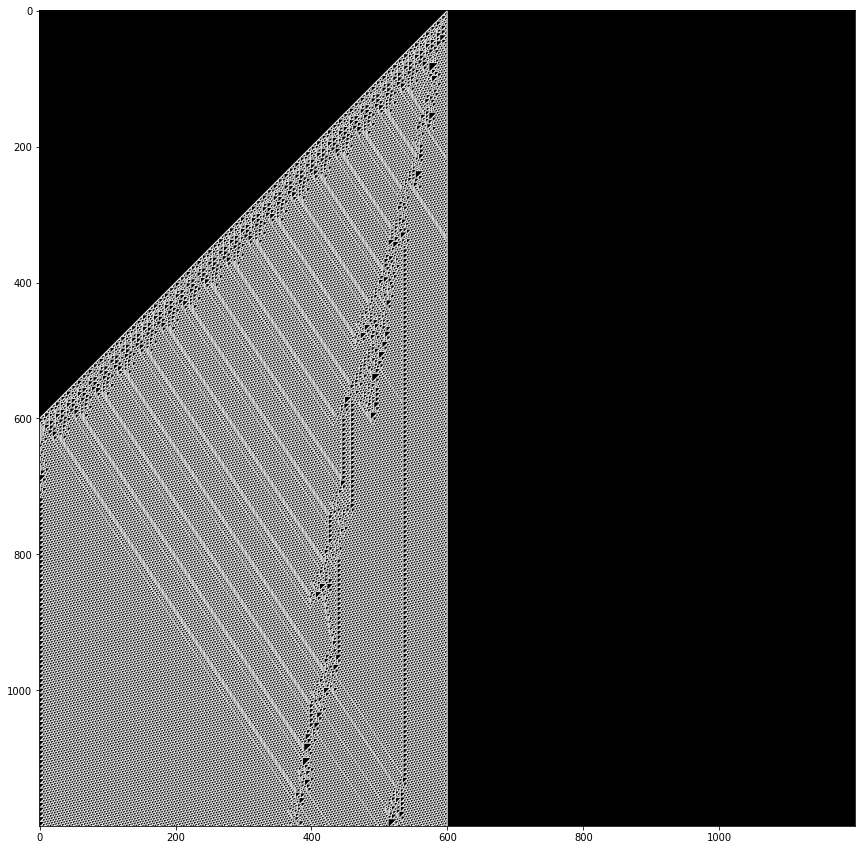

In [11]:
cellular_automaton(1200,110)

## Rule 57
Rule 35 generates a 3D pattern. Incredible.
##### 600 generations

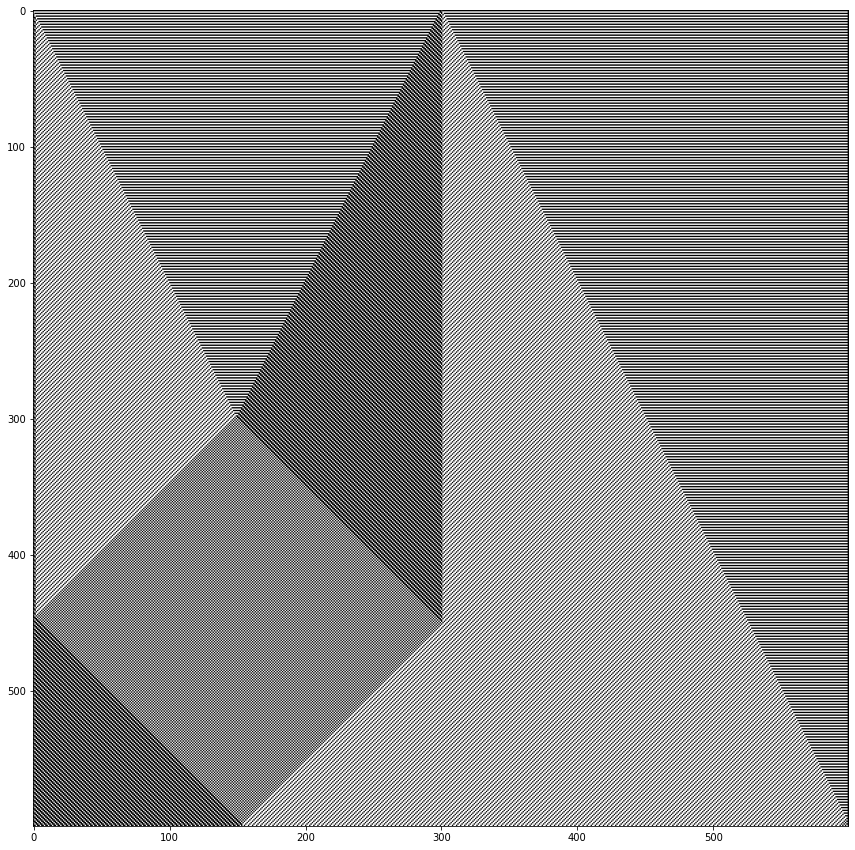

In [12]:
cellular_automaton(600,57)

## Rule 183
This rule generates a fractal pattern.

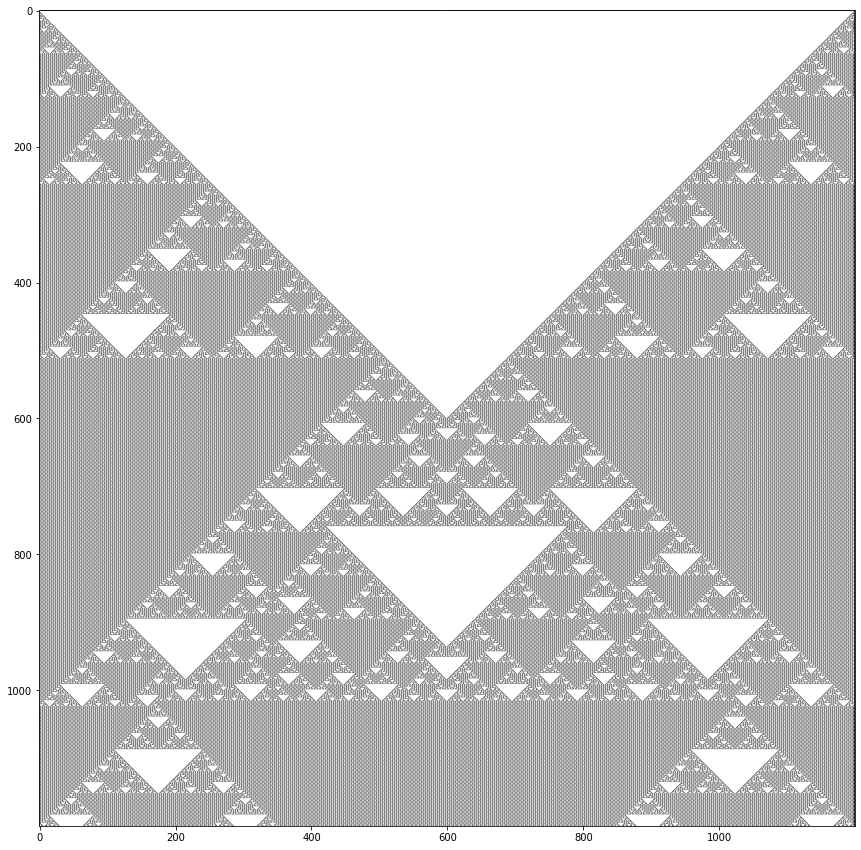

In [13]:
cellular_automaton(1200,183)

## Rule 77
##### 600 generations

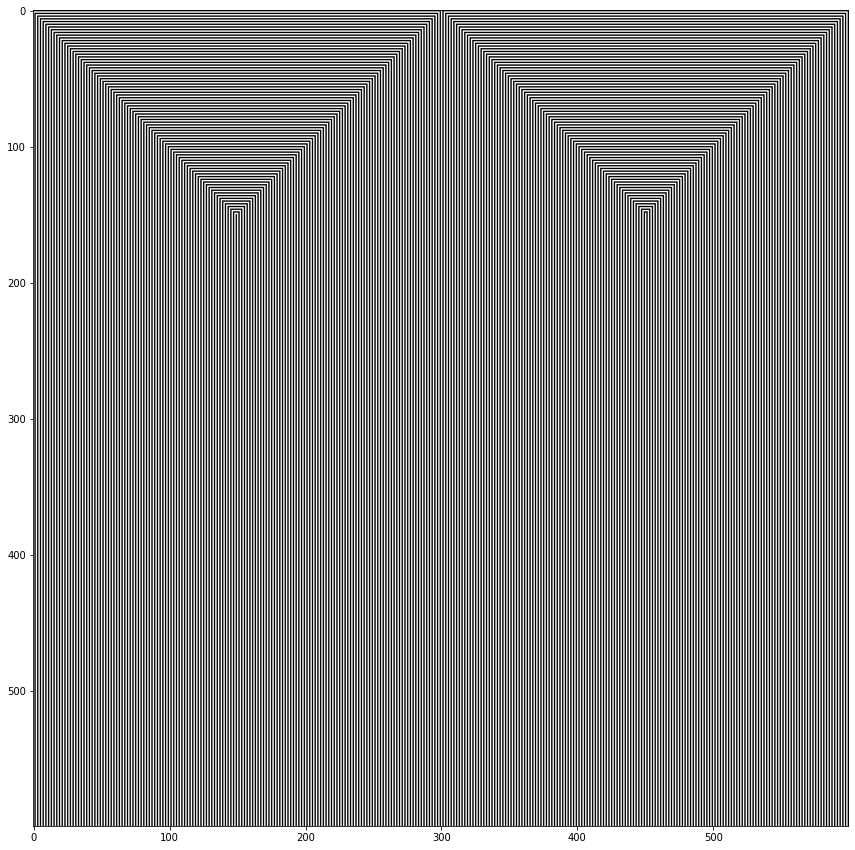

In [14]:
cellular_automaton(600,77)

## Rule 129
##### 1200 generations

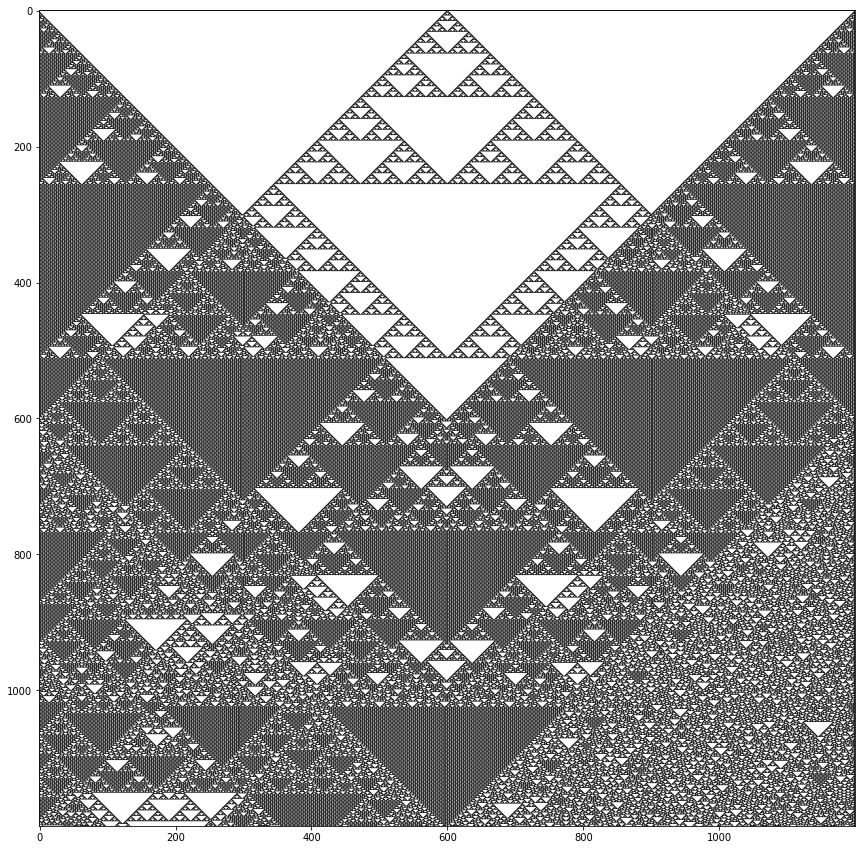

In [15]:
cellular_automaton(1200,129)

## Rule 45
###### 600 generations

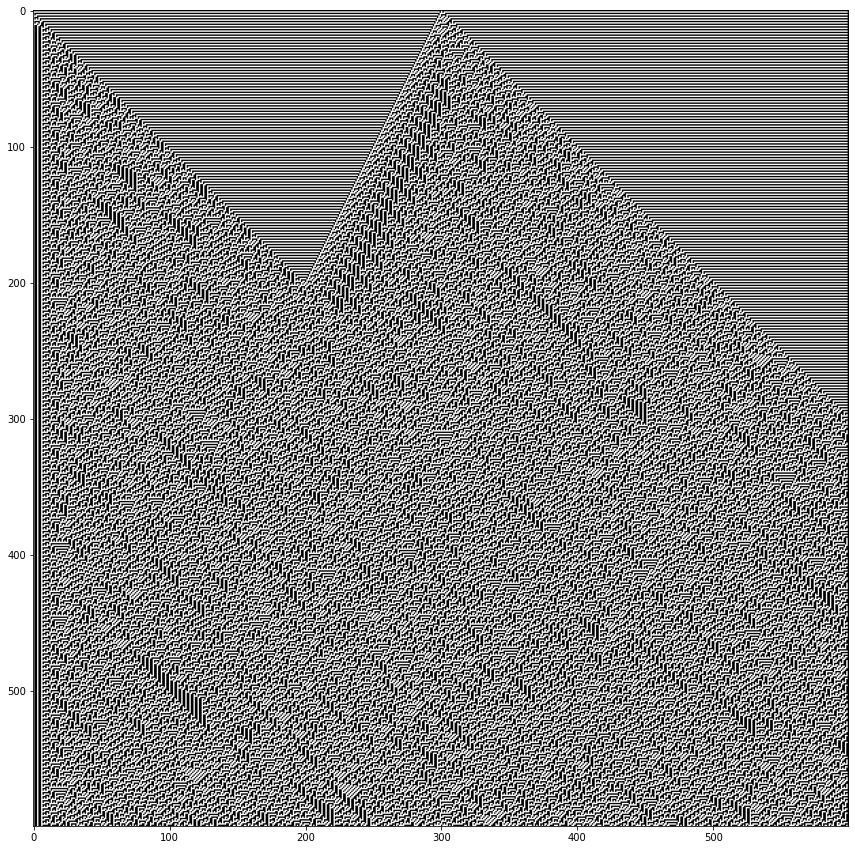

In [16]:
cellular_automaton(600,45)

##### 1200 generations

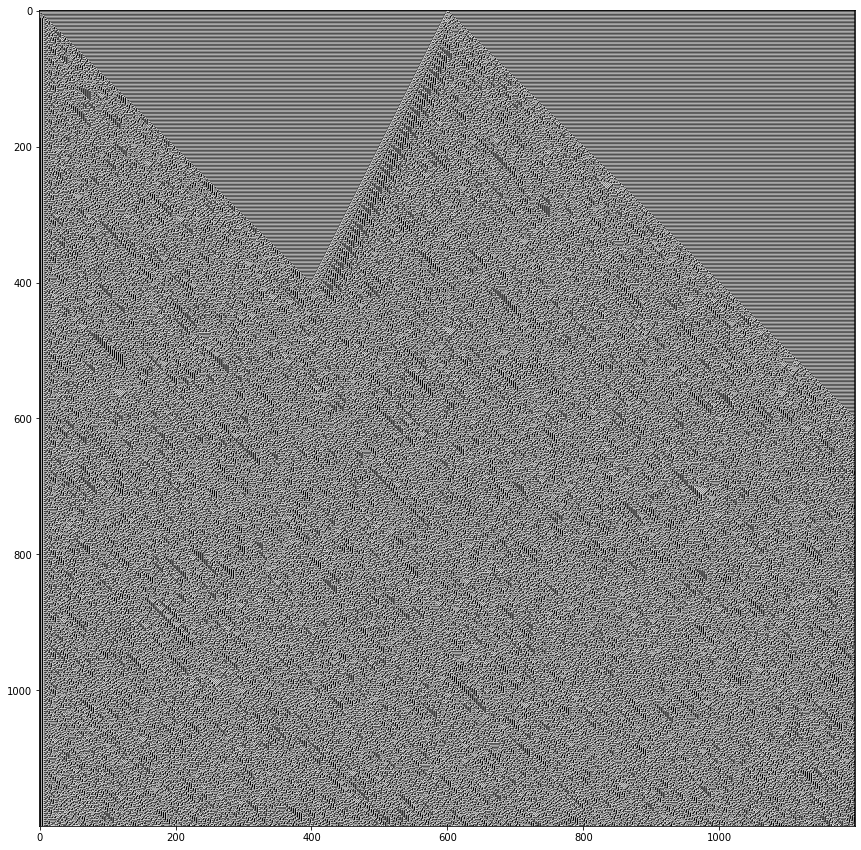

In [17]:
cellular_automaton(1200,45)